# 붓꽃 품종 예측

## 라이브러리

<Axes: >

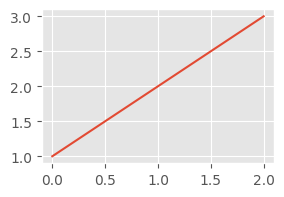

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))

## 데이터 불러오기

In [2]:
from sklearn.datasets import load_iris
 
# 붓꽃 데이터 로딩
iris = load_iris()
 
iris.keys()
 
# 독립변수
feature = iris.data
feature_name = iris.feature_names
 
# 종속변수
target = iris.target
target_name = iris.target_names
 
# 데이터프레임 만들기
df_iris = pd.DataFrame(feature, columns=feature_name)
df_iris['species'] = target
df_iris.head()
 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 데이터 이해

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df_iris['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

#### pairplot

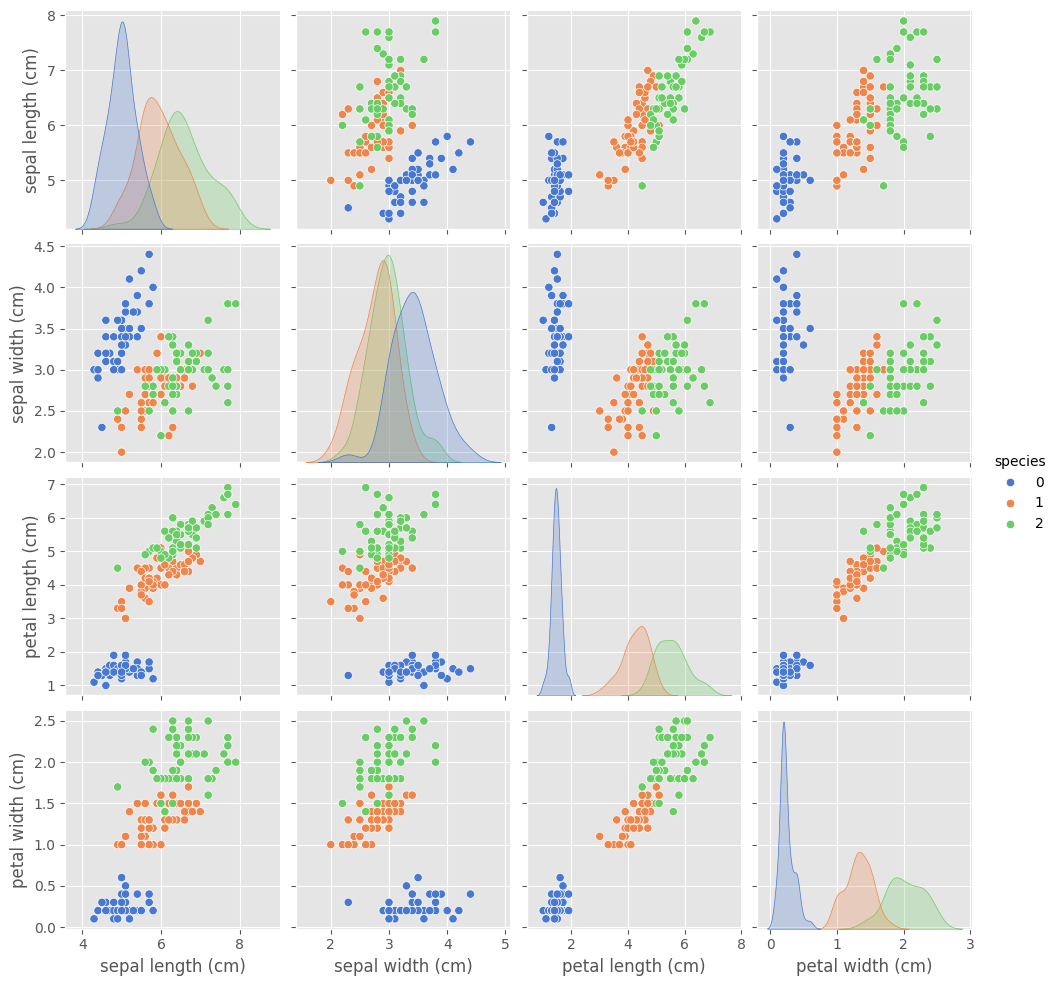

In [5]:
sns.pairplot(data=df_iris, hue='species', palette='muted')

## 모델 학습

In [6]:
#변수 선택
x = feature
y = target

In [14]:
# 학습데이터, 테스트 데이터 분할
from sklearn.model_selection import train_test_split

# stratify 옵션 사용하여 균등 추출(층화추출)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [15]:
pd.Series(y_train).value_counts()

0    40
2    40
1    40
Name: count, dtype: int64

In [16]:
# 모델 생성 및 훈련
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
# 테스트 데이터로 예측
pred = model.predict(x_test)
print(f'예측 = {pred}')
print(f'실제  = {y_test}')

예측 = [2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 1 0 0 1 1]
실제  = [2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]


## 모델 평가

In [18]:
# 평가
from sklearn.metrics import accuracy_score, classification_report
acc_score = accuracy_score(y_test, pred)
print(f'정확도 = {acc_score}')

class_report = classification_report(y_test, pred)
print(f'통계: \n {class_report}')

정확도 = 0.9666666666666667
통계: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### 트리 시각화

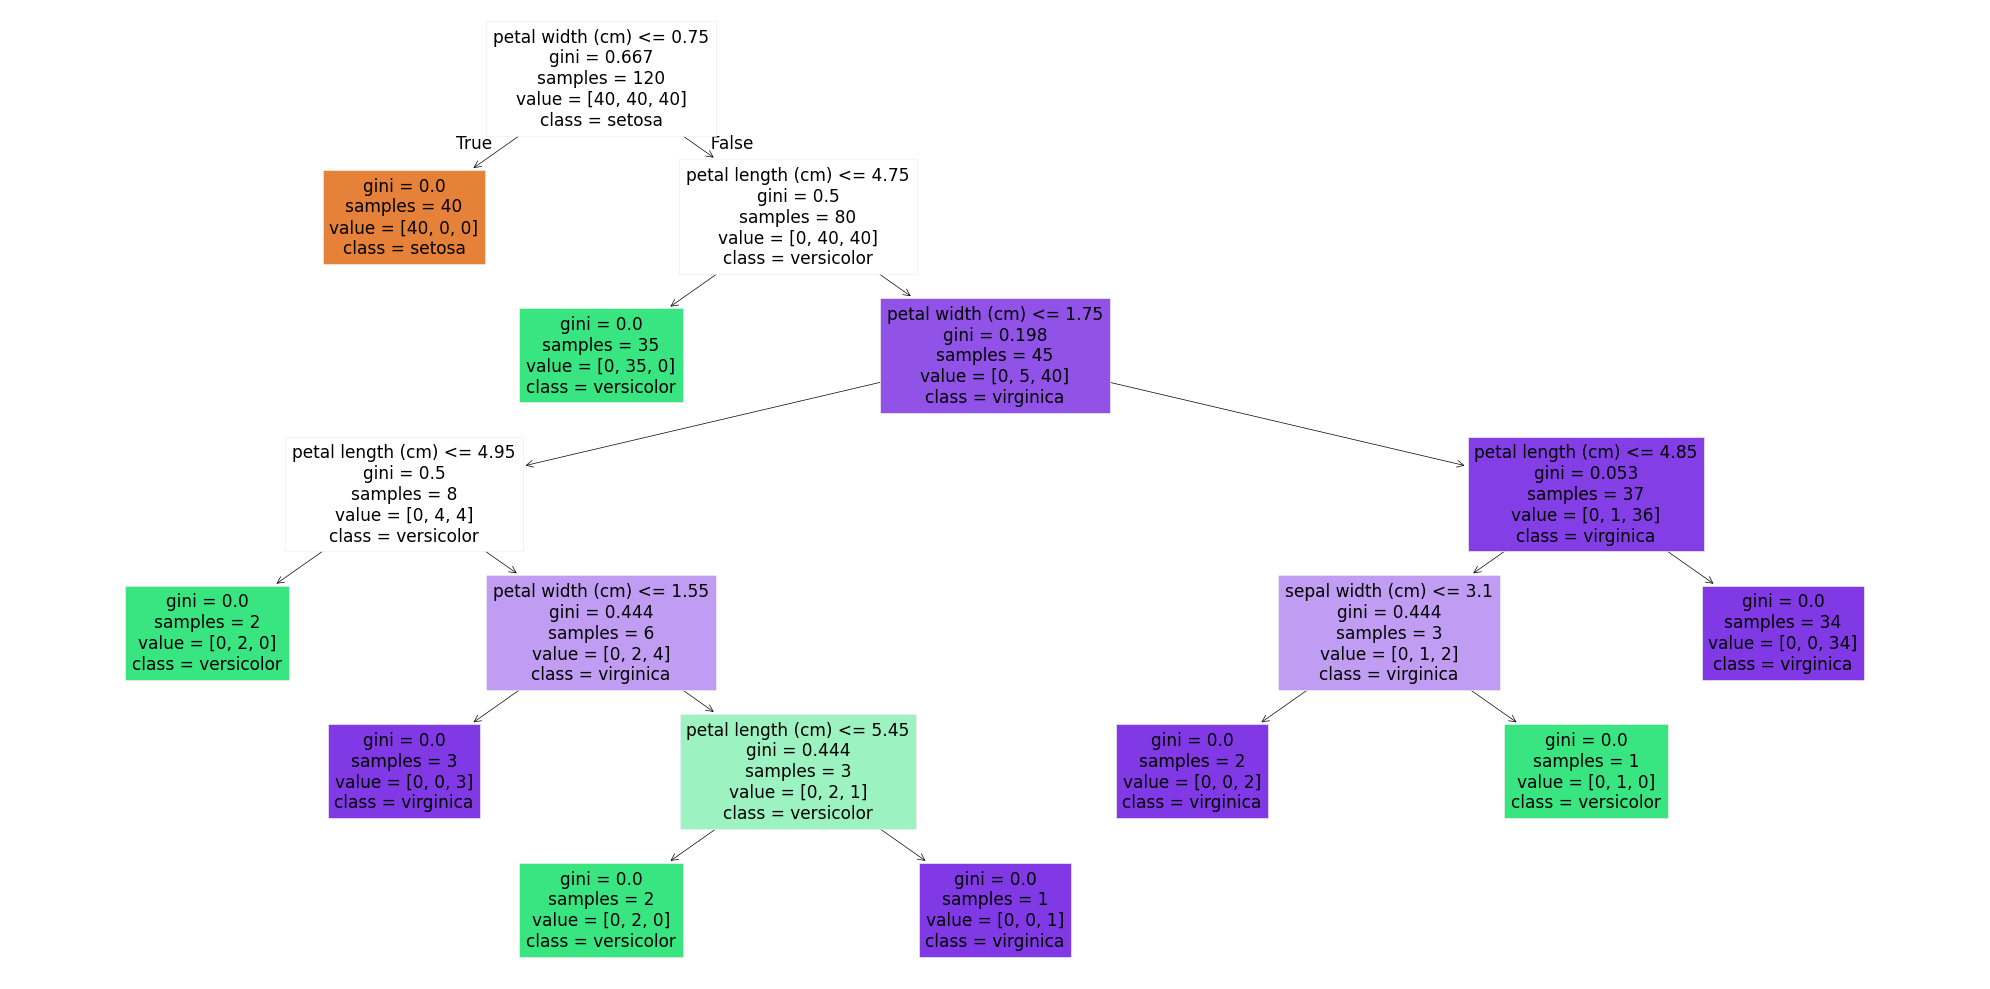

In [19]:
# 트리 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=feature_name, class_names=target_name, filled=True)
plt.tight_layout()

특성의 중요도

특성의 중요도 : [0.         0.01666667 0.42987988 0.55345345]


<Axes: >

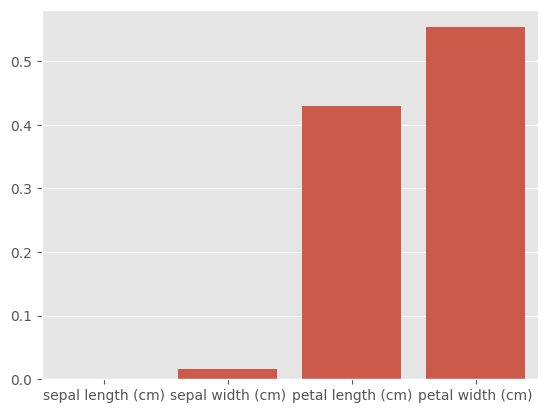

In [21]:
#특성의 중요도
print(f'특성의 중요도 : {model.feature_importances_}')

sns.barplot(x=feature_name, y=model.feature_importances_)

트리의 깊이 

In [22]:
model.get_depth()

6